In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
!pip3 install mido pygame matplotlib pandas seaborn numpy

In [ ]:
import os
from mido import MidiFile

def load_midi_files(directory):
    midi_files = []

    for filename in os.listdir(directory):
        if filename.endswith(".mid"):
            filepath = os.path.join(directory, filename)
            try:
                midi = MidiFile(filepath)
                midi_files.append(midi)
                print(f"Loaded: {filename}")
            except Exception as e:
                print(f"Failed to load {filename}: {e}")

    return midi_files

# Specify the directory containing the MIDI files
directory = "/content/drive/MyDrive/mid_files"

# Load all MIDI files
midi_files = load_midi_files(directory)

Loaded: Star-Wars-Theme-(From-'Star-Wars').mid
Loaded: Pirates of the Caribbean - He's a Pirate (1).mid
Loaded: Queen - Bohemian Rhapsody.mid
Loaded: Wii Channels - Mii Channel.mid
Loaded: darude-sandstorm.mid
Loaded: Op-Een-Grote-Paddestoel.mid
Loaded: wonderfulworld.mid
Loaded: Snoop Dogg - Ain't Nothing Personal.mid
Loaded: aaaaaaaaaaa_-_12.mid
Loaded: Touhou 6 The Embodiment of Scarlet Devil - Lunar Clock  Luna Dial.mid
Loaded: CAREY.Never forget you.mid
Loaded: Solar Stone - Speak In Sympathy (Neo & Farina Remix).mid
Loaded: goi_do.mid
Loaded: bluexmas.mid
Loaded: DoYouRemember2.mid
Loaded: freechild.mid
Loaded: Wouldn't-It-Be-Nice.mid
Loaded: Fire Emblem The Sacred Stones - Final Battle.mid
Loaded: Kareshi Kanojyo no Jiyo - Karekano - Tenshi no Yubikiri.mid
Loaded: Fernando-4.mid
Loaded: Sepultura - Subtraction.mid
Loaded: kane3.mid
Loaded: k7_10rah.mid
Loaded: hmbsjd_k.mid
Loaded: la_roux-in_for_the_kill.mid
Loaded: Barrios_Mangore_Tarantella.mid
Loaded: elcondor03.mid
Loaded: H

In [ ]:
from mido import MidiFile, MetaMessage

def gather_midi_insights(midi_files):
    insights = []

    for midi in midi_files:
        midi_info = {
            'filename': midi.filename,
            'num_tracks': len(midi.tracks),
            'total_length_sec': midi.length,
            'tempo': None,
            'time_signature': None,
            'key_signature': None,
            'instruments': set(),
            'num_notes': 0,
            'unique_pitches': set(),
        }

        for i, track in enumerate(midi.tracks):
            for msg in track:
                if msg.type == 'set_tempo':
                    midi_info['tempo'] = msg.tempo
                elif msg.type == 'time_signature':
                    midi_info['time_signature'] = f"{msg.numerator}/{msg.denominator}"
                elif msg.type == 'key_signature':
                    midi_info['key_signature'] = msg.key
                elif msg.type == 'program_change':
                    midi_info['instruments'].add(msg.program)
                elif msg.type == 'note_on' and msg.velocity > 0:
                    midi_info['num_notes'] += 1
                    midi_info['unique_pitches'].add(msg.note)

        insights.append(midi_info)

    return insights

# Gather insights from the loaded MIDI files
midi_insights = gather_midi_insights(midi_files)

# Display gathered insights
for insight in midi_insights:
    print(f"\nFile: {insight['filename']}")
    print(f" - Number of Tracks: {insight['num_tracks']}")
    print(f" - Total Length (seconds): {insight['total_length_sec']:.2f}")
    print(f" - Tempo: {insight['tempo']}")
    print(f" - Time Signature: {insight['time_signature']}")
    print(f" - Key Signature: {insight['key_signature']}")
    print(f" - Instruments (Program Numbers): {insight['instruments']}")
    print(f" - Number of Notes: {insight['num_notes']}")
    print(f" - Unique Pitches: {sorted(insight['unique_pitches'])}")



File: /content/drive/MyDrive/mid_files/Star-Wars-Theme-(From-'Star-Wars').mid
 - Number of Tracks: 10
 - Total Length (seconds): 26.40
 - Tempo: 480000
 - Time Signature: 4/4
 - Key Signature: None
 - Instruments (Program Numbers): {33, 71, 73, 48, 60, 61, 63}
 - Number of Notes: 691
 - Unique Pitches: [24, 31, 36, 38, 39, 40, 41, 43, 46, 48, 51, 52, 53, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 79, 81, 82, 83, 84, 86, 87, 88, 89, 91, 93, 95, 96, 98, 100, 101, 103]

File: /content/drive/MyDrive/mid_files/Pirates of the Caribbean - He's a Pirate (1).mid
 - Number of Tracks: 4
 - Total Length (seconds): 77.62
 - Tempo: 300000
 - Time Signature: 6/8
 - Key Signature: F
 - Instruments (Program Numbers): {0, 48}
 - Number of Notes: 1453
 - Unique Pitches: [26, 29, 31, 33, 34, 36, 38, 41, 43, 45, 46, 48, 50, 53, 55, 57, 58, 59, 60, 61, 62, 64, 65, 67, 69, 70, 72, 73, 74, 76, 77, 79, 81, 82, 84]

File: /content/drive/MyDrive/mid_files/Queen - Bohemian Rh

<ipython-input-5-3bfa537810c8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='filename', y='num_tracks', data=df, palette='Blues_d')


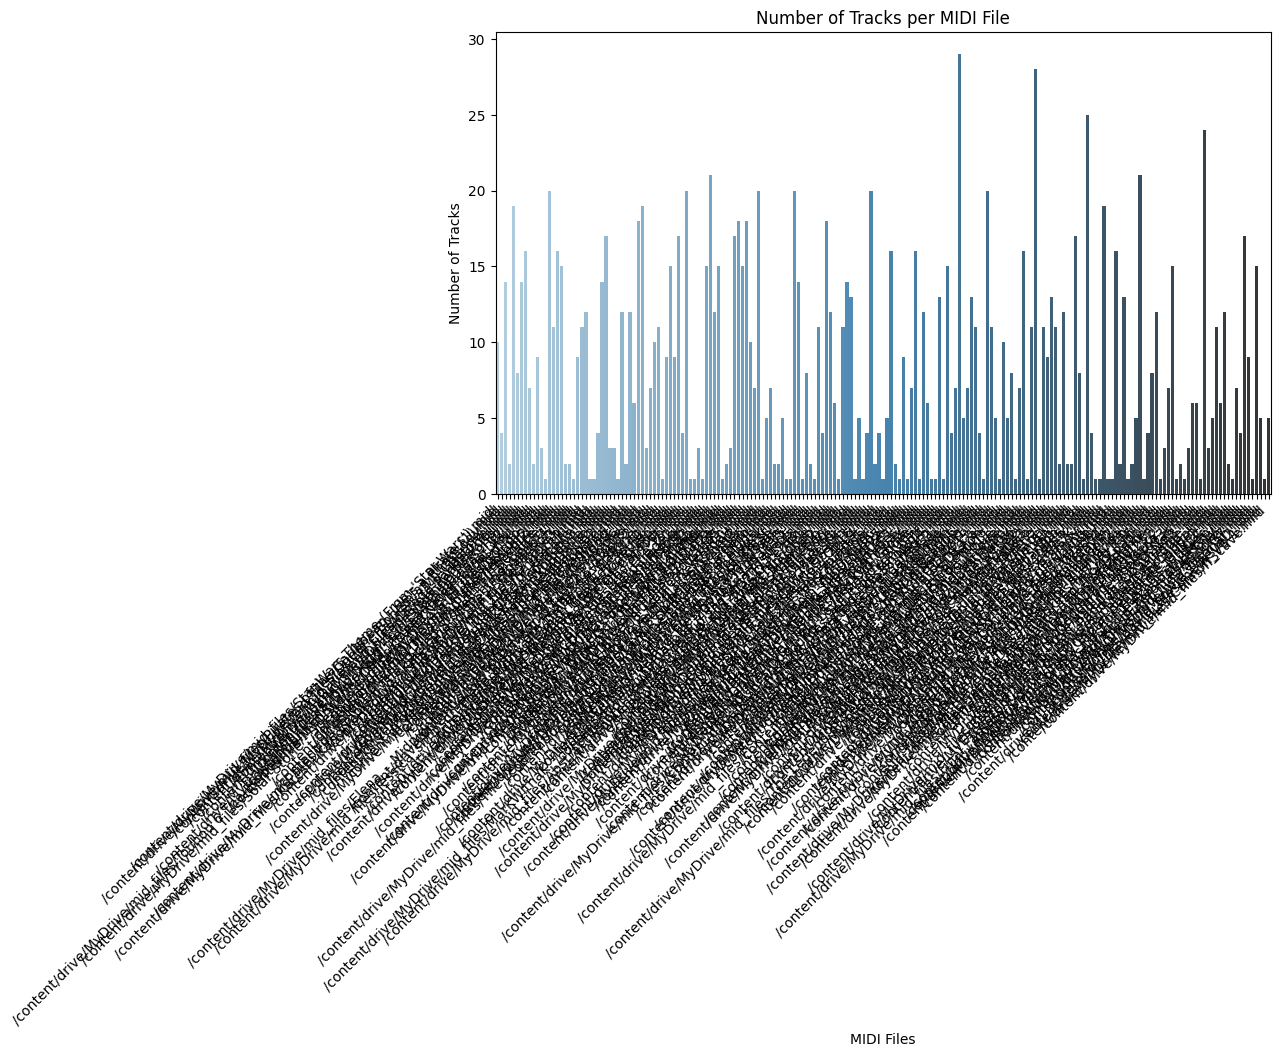

<ipython-input-5-3bfa537810c8>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='filename', y='total_length_sec', data=df, palette='Greens_d')


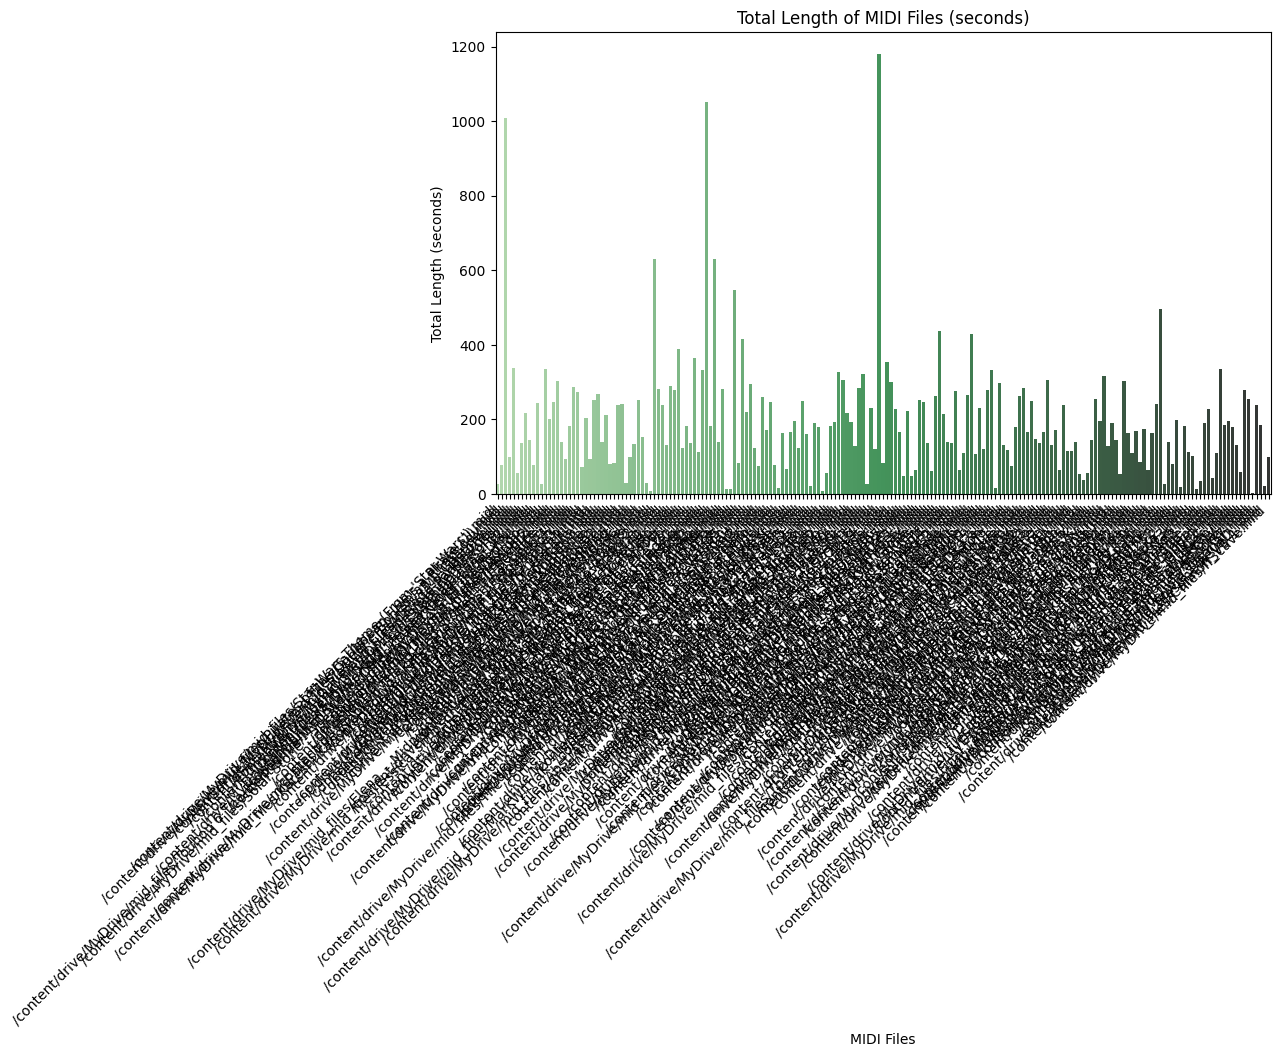

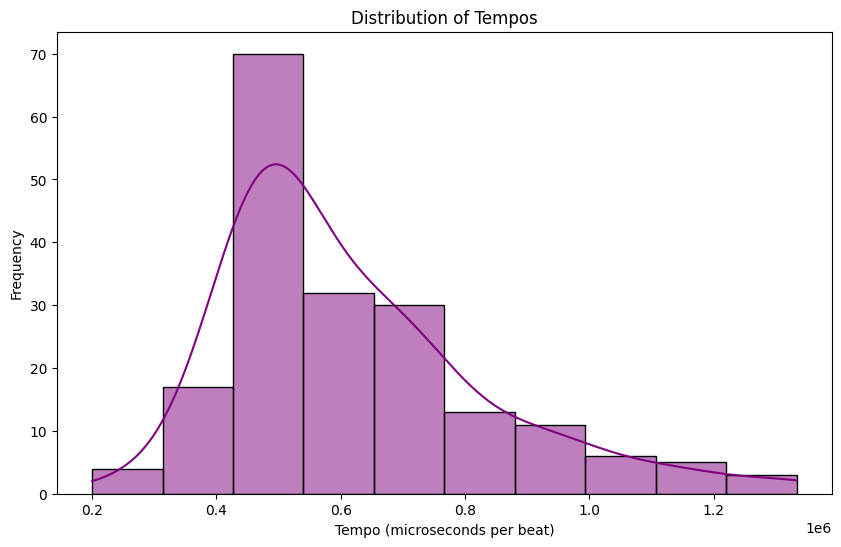

<ipython-input-5-3bfa537810c8>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='filename', y='num_notes', data=df, palette='Reds_d')


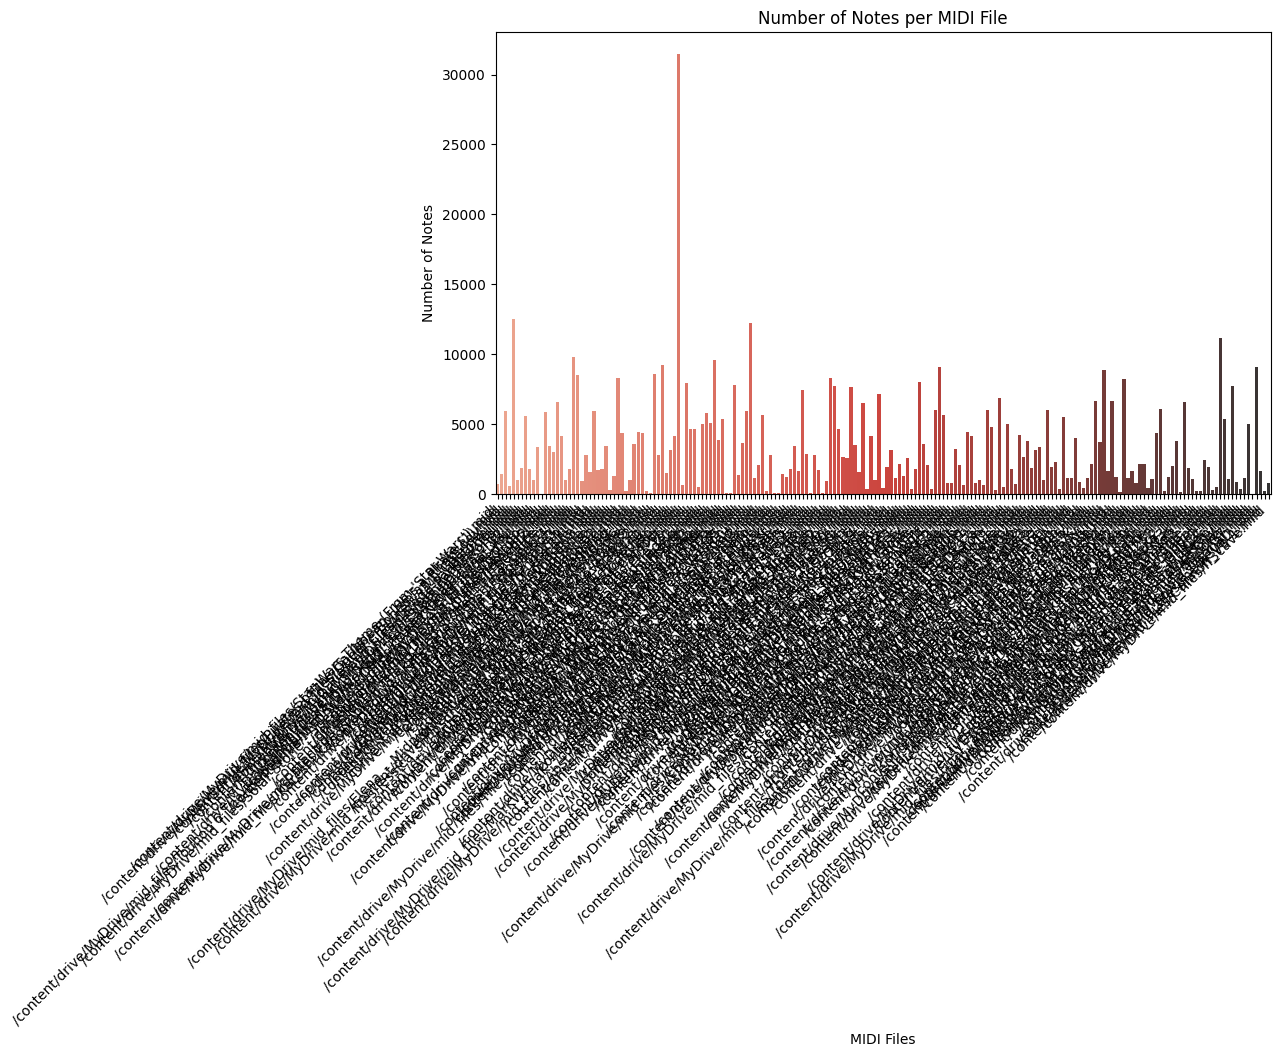

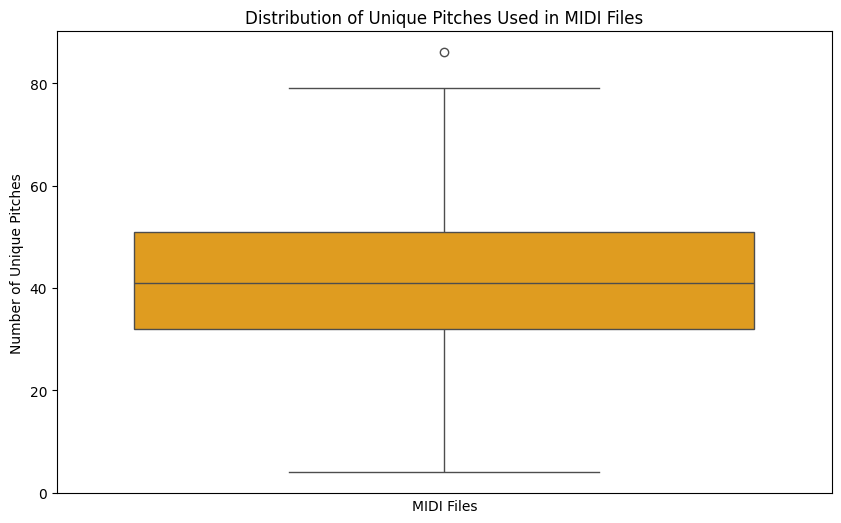

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_midi_insights(midi_insights):
    # Convert the insights into a pandas DataFrame
    df = pd.DataFrame(midi_insights)

    # Number of Tracks per MIDI File
    plt.figure(figsize=(10, 6))
    sns.barplot(x='filename', y='num_tracks', data=df, palette='Blues_d')
    plt.title('Number of Tracks per MIDI File')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Tracks')
    plt.xlabel('MIDI Files')
    plt.show()

    # Total Length of MIDI Files
    plt.figure(figsize=(10, 6))
    sns.barplot(x='filename', y='total_length_sec', data=df, palette='Greens_d')
    plt.title('Total Length of MIDI Files (seconds)')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Total Length (seconds)')
    plt.xlabel('MIDI Files')
    plt.show()

    # Distribution of Tempos
    plt.figure(figsize=(10, 6))
    sns.histplot(df['tempo'].dropna(), bins=10, kde=True, color='purple')
    plt.title('Distribution of Tempos')
    plt.xlabel('Tempo (microseconds per beat)')
    plt.ylabel('Frequency')
    plt.show()

    # Number of Notes per MIDI File
    plt.figure(figsize=(10, 6))
    sns.barplot(x='filename', y='num_notes', data=df, palette='Reds_d')
    plt.title('Number of Notes per MIDI File')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Notes')
    plt.xlabel('MIDI Files')
    plt.show()

    # Unique Pitches Used
    df['num_unique_pitches'] = df['unique_pitches'].apply(len)
    plt.figure(figsize=(10, 6))
    sns.boxplot(y='num_unique_pitches', data=df, color='orange')
    plt.title('Distribution of Unique Pitches Used in MIDI Files')
    plt.ylabel('Number of Unique Pitches')
    plt.xlabel('MIDI Files')
    plt.xticks([])
    plt.show()

# Visualize the gathered insights
visualize_midi_insights(midi_insights)


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset

# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [ ]:
import mido
import os

def parse_midi_file(filepath):
    events = []
    try:
        mid = mido.MidiFile(filepath)
        for i, track in enumerate(mid.tracks):
            for msg in track:
                if msg.type in ['note_on', 'note_off']:
                    # Encode as (event type, note, velocity)
                    event_type = 1 if msg.type == 'note_on' else 0
                    events.append((event_type, msg.note, msg.velocity))
    except Exception as e:
        print(f"Error parsing file {filepath}: {e}")
    return events

def encode_events(events, event_to_int):
    encoded = []
    for event in events:
        encoded.append(event_to_int[event])
    return encoded

def preprocess_midi_files(directory):
    all_sequences = []

    for filename in os.listdir(directory):
        if filename.endswith(".mid") or filename.endswith(".midi"):
            filepath = os.path.join(directory, filename)
            events = parse_midi_file(filepath)
            if events:  # Only add non-empty event lists
                all_sequences.append(events)

    return all_sequences

# Parse and encode MIDI files
directory = "/content/drive/MyDrive/mid_files"
sequences = preprocess_midi_files(directory)

# Calculate the total number of tracks
total_tracks = sum(len(seq) for seq in sequences)
print(f"Total number of tracks = {total_tracks}")

Error parsing file /content/drive/MyDrive/mid_files/lvl13.mid: data byte must be in range 0..127
Error parsing file /content/drive/MyDrive/mid_files/dustwind03.mid: 
Total number of tracks = 1263277


In [ ]:
# Initialize a set to collect unique tuples
unique_tuples = set()

# Iterate through the 2D array and add each tuple to the set
for row in sequences:
    for tuple_element in row:
        unique_tuples.add(tuple_element)

# Convert the set to a sorted list if needed
unique_tuples = sorted(unique_tuples)

# Print or return the results
print("Unique sounds:", len(unique_tuples))



Unique sounds: 13468


In [ ]:
def create_event_to_int_mapping(sequences):
    event_set = set()
    for seq in sequences:
        event_set.update(seq)

    event_to_int = {event: i for i, event in enumerate(sorted(event_set))}
    int_to_event = {i: event for event, i in event_to_int.items()}
    return event_to_int, int_to_event

event_to_int, int_to_event = create_event_to_int_mapping(sequences)

# Encode all sequences
encoded_sequences = [encode_events(seq, event_to_int) for seq in sequences]

In [ ]:
import numpy as np

def pad_sequences(sequences, max_len, padding_value=0):
    padded_sequences = []
    for seq in sequences:
        if len(seq) < max_len:
            seq = seq + [padding_value] * (max_len - len(seq))
        else:
            seq = seq[:max_len]
        padded_sequences.append(seq)
    return np.array(padded_sequences)

# Set maximum sequence length
max_seq_length = 1000  # You can adjust this based on your data

# Pad/Truncate sequences
padded_sequences = pad_sequences(encoded_sequences, max_seq_length)


In [ ]:
class MIDIDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = torch.tensor(sequences, dtype=torch.long)

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx]

# Create DataLoader
batch_size = 16
dataset = MIDIDataset(padded_sequences)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [ ]:
import torch
import torch.nn as nn

class MusicTransformer(nn.Module):
    def __init__(self, vocab_size, embed_size, num_heads, num_layers, forward_expansion, dropout, max_length):
        super(MusicTransformer, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.positional_encoding = nn.Parameter(torch.zeros(1, max_length, embed_size))
        self.transformer = nn.Transformer(
            d_model=embed_size,
            nhead=num_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dim_feedforward=forward_expansion * embed_size,
            dropout=dropout,
            batch_first=True,
        )
        self.fc_out = nn.Linear(embed_size, vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, tgt):
        # Embed and add positional encoding
        x = self.embedding(x) + self.positional_encoding[:, :x.size(1), :]
        tgt = self.embedding(tgt) + self.positional_encoding[:, :tgt.size(1), :]

        # Apply dropout
        x = self.dropout(x)
        tgt = self.dropout(tgt)

        # Forward pass through the transformer
        transformer_out = self.transformer(x, tgt)
        out = self.fc_out(transformer_out)
        return out

print(f"Number of classes:{len(event_to_int)}")
# Model Hyperparameters
vocab_size = len(event_to_int)  # Number of unique MIDI events
embed_size = 256
num_heads = 8
num_layers = 8
forward_expansion = 4
dropout = 0.2
max_length = max_seq_length  # This should match the sequence length used in preprocessing

# Initialize the model
model = MusicTransformer(
    vocab_size, embed_size, num_heads, num_layers, forward_expansion, dropout, max_length
).to(device)

print(model)


Number of classes:13468
MusicTransformer(
  (embedding): Embedding(13468, 256)
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-7): 8 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=1024, bias=True)
          (dropout): Dropout(p=0.2, inplace=False)
          (linear2): Linear(in_features=1024, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.2, inplace=False)
          (dropout2): Dropout(p=0.2, inplace=False)
        )
      )
      (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-7): 8 x Tr

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch in dataloader:
        batch = batch.to(device)

        # Input and target sequences
        x = batch[:, :-1]  # Input sequence
        y = batch[:, 1:]   # Target sequence (shifted by one time step)

        optimizer.zero_grad()

        # Forward pass
        output = model(x, x)

        # Reshape output and target to be compatible with CrossEntropyLoss
        output = output.reshape(-1, vocab_size)  # Use .reshape instead of .view
        y = y.reshape(-1)  # Use .reshape instead of .view

        # Calculate loss and backpropagate
        loss = criterion(output, y)
        loss.backward()

        # Update model parameters
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(dataloader):.4f}")



Epoch 1/10, Loss: 9.0703
Epoch 2/10, Loss: 8.4523
Epoch 3/10, Loss: 8.1237
Epoch 4/10, Loss: 7.9363
Epoch 5/10, Loss: 7.7271
Epoch 6/10, Loss: 7.4606
Epoch 7/10, Loss: 7.2593
Epoch 8/10, Loss: 7.0464
Epoch 9/10, Loss: 6.8671
Epoch 10/10, Loss: 6.7943


In [ ]:
# Save the model
model_save_path = 'music_generator.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to music_generator.pth


In [ ]:
import torch

def generate_music(model, seed_sequence, max_length, int_to_event, temperature=1.0, top_k=10, device='cuda'):
    model.eval()  # Set the model to evaluation mode
    generated_sequence = seed_sequence.copy()  # Start with the seed sequence

    # Convert seed sequence to tensor and ensure it has the correct dimensions
    x = torch.tensor(seed_sequence, dtype=torch.long).unsqueeze(0).to(device)  # Add batch dimension

    with torch.no_grad():
        for _ in range(max_length - len(seed_sequence)):
            # Predict the next event
            output = model(x, x)  # Autoregressive prediction
            output = output[:, -1, :]  # Get the output for the last time step

            # Apply temperature scaling
            output = output / temperature

            # Apply top-k filtering
            top_k_values, top_k_indices = torch.topk(output, top_k, dim=-1)
            top_k_probs = torch.nn.functional.softmax(top_k_values, dim=-1)

            # Sample from the top-k probable events
            next_event_idx = top_k_indices[0, torch.multinomial(top_k_probs, 1).item()].item()

            # Append the predicted event to the sequence
            generated_sequence.append(next_event_idx)

            # Update the input tensor with the new event
            x = torch.tensor(generated_sequence[-x.size(1):], dtype=torch.long).unsqueeze(0).to(device)

    # Convert generated sequence back to events
    generated_events = [int_to_event[idx] for idx in generated_sequence]

    return generated_events


In [ ]:
import random

# Step 1: Generate a random length between 1 and 500
seed_length = random.randint(1, 500)

# Step 2: Randomly select tuples to create the seed sequence
seed_sequence = [random.choice(unique_tuples) for _ in range(seed_length)]

# Print or use the seed sequence
print("Generated seed sequence:", seed_sequence)


Generated seed sequence: [(0, 72, 4), (1, 91, 77), (1, 35, 112), (1, 55, 103), (1, 70, 6), (0, 81, 77), (1, 50, 62), (1, 69, 40), (1, 60, 93), (1, 40, 30), (0, 90, 31), (0, 52, 120), (1, 64, 64), (1, 62, 42), (1, 83, 50), (1, 65, 31), (0, 38, 20), (0, 79, 65), (1, 27, 92), (0, 45, 116), (1, 40, 59), (1, 91, 83), (1, 33, 106), (0, 72, 74), (0, 34, 110), (0, 67, 32), (1, 65, 66), (1, 84, 118), (1, 40, 11), (0, 76, 80), (1, 73, 110), (1, 52, 41), (0, 77, 113), (1, 24, 112), (1, 88, 113), (0, 65, 13), (1, 73, 42), (1, 44, 56), (1, 40, 59), (0, 75, 62), (1, 36, 70), (1, 40, 14), (0, 81, 99), (0, 80, 54), (0, 89, 4), (1, 89, 73), (0, 44, 9), (0, 54, 87), (1, 37, 97), (1, 37, 33), (1, 29, 45), (1, 39, 11), (1, 82, 43), (0, 53, 56), (0, 82, 95), (1, 83, 46), (0, 50, 77), (1, 52, 85), (1, 80, 65), (0, 69, 89), (0, 60, 90), (1, 76, 108), (1, 80, 75), (0, 58, 29), (0, 48, 116), (1, 89, 58), (1, 33, 73), (0, 38, 0), (1, 87, 116), (0, 77, 94), (0, 88, 69), (1, 39, 122), (1, 66, 51), (1, 56, 117), (

In [ ]:
encoded_seed = [encode_events(seed_sequence, event_to_int)]
padded_seed = pad_sequences(encoded_seed, max_seq_length)[0]

max_length = 100  # Set the maximum length of the generated sequence

# Generate music
generated_sequence = generate_music(
    model,
    padded_seed,
    max_length,
    int_to_event,
    temperature=1.5,  # Adjust temperature for more/less randomness
    top_k = 10,
    device=device
)

# Print the generated events
print(generated_sequence)

[(0, 72, 4), (1, 91, 77), (1, 35, 112), (1, 55, 103), (1, 70, 6), (0, 81, 77), (1, 50, 62), (1, 69, 40), (1, 60, 93), (1, 40, 30), (0, 90, 31), (0, 52, 120), (1, 64, 64), (1, 62, 42), (1, 83, 50), (1, 65, 31), (0, 38, 20), (0, 79, 65), (1, 27, 92), (0, 45, 116), (1, 40, 59), (1, 91, 83), (1, 33, 106), (0, 72, 74), (0, 34, 110), (0, 67, 32), (1, 65, 66), (1, 84, 118), (1, 40, 11), (0, 76, 80), (1, 73, 110), (1, 52, 41), (0, 77, 113), (1, 24, 112), (1, 88, 113), (0, 65, 13), (1, 73, 42), (1, 44, 56), (1, 40, 59), (0, 75, 62), (1, 36, 70), (1, 40, 14), (0, 81, 99), (0, 80, 54), (0, 89, 4), (1, 89, 73), (0, 44, 9), (0, 54, 87), (1, 37, 97), (1, 37, 33), (1, 29, 45), (1, 39, 11), (1, 82, 43), (0, 53, 56), (0, 82, 95), (1, 83, 46), (0, 50, 77), (1, 52, 85), (1, 80, 65), (0, 69, 89), (0, 60, 90), (1, 76, 108), (1, 80, 75), (0, 58, 29), (0, 48, 116), (1, 89, 58), (1, 33, 73), (0, 38, 0), (1, 87, 116), (0, 77, 94), (0, 88, 69), (1, 39, 122), (1, 66, 51), (1, 56, 117), (1, 38, 125), (0, 59, 55),

In [ ]:
import pygame
import numpy as np
import random

# Initialize Pygame Mixer
pygame.mixer.init(frequency=22050, size=-16, channels=1)

# Function to convert MIDI note number to frequency
def midi_to_frequency(midi_note):
    A440 = 440.0
    return A440 * 2 ** ((midi_note - 69) / 12.0)

# Function to generate a sound wave with multiple sweet-sounding waveforms and ADSR envelope
def generate_tone(frequency, duration, sample_rate=22050, fade_out_duration=0.05, seed=42):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

    # Initialize random number generator with a seed
    rng = np.random.default_rng(seed)

    # Define sweet-sounding waveforms
    sine_wave = 0.5 * np.sin(2 * np.pi * frequency * t)
    triangle_wave = 0.5 * (2 / np.pi) * np.arcsin(np.sin(2 * np.pi * frequency * t))
    sawtooth_wave = 0.5 * (2 * (t * frequency - np.floor(0.5 + t * frequency)))
    square_wave = 0.5 * np.sign(np.sin(2 * np.pi * frequency * t))
    harmonic_sine_wave = 0.5 * np.sin(2 * np.pi * frequency * t * 2)  # Harmonic sine wave
    low_freq_sine_wave = 0.5 * np.sin(2 * np.pi * frequency * t * 0.5)  # Low-frequency sine wave

    # Gaussian wave (bell-like sound)
    gaussian_wave = 0.5 * np.exp(-0.5 * ((t - duration / 2) / (duration / 6))**2)

    # Complex sine wave (sum of multiple sine waves)
    complex_sine_wave = 0.25 * (np.sin(2 * np.pi * frequency * t) +
                                np.sin(2 * np.pi * frequency * 2 * t) +
                                np.sin(2 * np.pi * frequency * 3 * t))

    # List of sweet-sounding waveforms
    sweet_waves = [
        sine_wave, triangle_wave, sawtooth_wave, square_wave,
        harmonic_sine_wave, low_freq_sine_wave,
        gaussian_wave, complex_sine_wave
    ]

    # Randomly select a combination of waveforms
    num_waveforms = random.randint(1, len(sweet_waves))  # Choose 1 to all waveforms
    selected_waveforms = random.sample(sweet_waves, num_waveforms)

    # Mix waveforms
    waveform = np.mean(selected_waveforms, axis=0)

    # Apply ADSR envelope
    attack = 0.05  # Attack time in seconds
    decay = 0.1    # Decay time in seconds
    sustain_level = 0.7  # Sustain level (0 to 1)
    sustain_duration = duration - attack - decay - fade_out_duration
    release = fade_out_duration

    adsr = np.concatenate([
        np.linspace(0, 1, int(sample_rate * attack)),  # Attack
        np.linspace(1, sustain_level, int(sample_rate * decay)),  # Decay
        np.full(int(sample_rate * sustain_duration), sustain_level),  # Sustain
        np.linspace(sustain_level, 0, int(sample_rate * release))  # Release
    ])

    # Ensure the ADSR envelope matches the waveform length
    if len(adsr) < len(waveform):
        adsr = np.concatenate([adsr, np.zeros(len(waveform) - len(adsr))])
    elif len(adsr) > len(waveform):
        adsr = adsr[:len(waveform)]

    waveform *= adsr

    waveform = np.int16(waveform * 32767)  # Convert to 16-bit PCM format
    return waveform

# Function to play a tone
def play_tone(frequency, duration):
    tone_data = generate_tone(frequency, duration)
    sound = pygame.sndarray.make_sound(tone_data)
    sound.play()
    pygame.time.wait(int(duration * 1000))  # Wait for the sound to finish

# Function to play a sequence of MIDI events with varied tones
def play_sequence(events, duration_per_note=0.5):
    for event in events:
        _, midi_note, velocity = event
        frequency = midi_to_frequency(midi_note)

        # Optionally, you could vary other parameters like duration here
        play_tone(frequency, duration_per_note)

play_sequence(generated_sequence)

pygame 2.6.0 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


error: ALSA: Couldn't open audio device: No such file or directory